In [1]:
# from matplotlib.animation import FuncAnimation
# from animation import Anim
# from matplotlib.interactivePlot import InteractivePlot as Plot
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
import h5py
import glob
import os

In [3]:
# nx =fs_IS[0]['Domain'].attrs['nx']
# NN = nx //2 
# print(NN)

In [4]:
fs_IS[0]['Domain'].attrs.keys()

<KeysViewHDF5 ['Ng', 'Nx', 'Ny', 'Nz', 'dt', 'dx', 'dy', 'dz', 'endTime', 'nx', 'ny', 'nz', 'xmax', 'xmin', 'ymax', 'ymin', 'zmax', 'zmin']>

In [5]:
def getFourierTrans(intPlot, u):
    """
    Returns the 1D discrete fourier transform of the variable u along the x-direction
    ready for the power spectrum method.
    Parameters
    ----------
    intPlot : object
        interactivePlot object containing all the simulation data, normally the final instance
    u : ndarray
        Two dimensional array of the variable we want the power spectrum of
    Returns
    -------
    uhat : array (N,)
        Fourier transform of u
    """
    nx, ny = intPlot['Domain'].attrs['nx'][0], intPlot['Domain'].attrs['ny'][0]
    NN = nx // 2
    uhat = np.zeros((NN, ny), dtype=np.complex_)

    for k in range(NN):
        for y in range(ny):
            # Sum over all x adding to uhat
            for i in range(nx):
                uhat[k, y] += u[i, y] * np.exp(-(2*np.pi*1j*k*i)/nx)

    return uhat / nx

In [6]:
# getFourierTrans(fs_IS[0], fs_IS[0]['Primitive/v1'])

In [7]:
def getPowerSpectrumSq(intPlot, u):
    """
    Returns the integrated power spectrum of the variable u, up to the Nyquist frequency = nx/2
    Parameters
    ----------
    intPlot : object
        interactivePlot object containing all the simulation data, normally the final instance
    u : ndarray
        Two dimensional array of the variable we want the power spectrum of
    """
    NN = intPlot['Domain'].attrs['nx'][0] // 2
    dy = intPlot['Domain'].attrs['dy'][0]
    uhat = getFourierTrans(intPlot, u)
    P = np.zeros(NN)

    for k in range(NN):
        for j in range(intPlot['Domain'].attrs['ny'][0]):
            P[k] += (np.absolute(uhat[k, j])**2) * dy

    P = P / np.sum(P)
    return P

In [8]:
def GetKESF(frame):
    """
    Retrieves and computes the kinetic energy density for each frame in a single fluid animation.
    Parameters
    ----------
    anim : object
        animation class containing all user def variables
    frame : Array
        Frame from the animation class containing all user def variables at the time we want
    """
    vx = frame['Primitive/v1'][:]
    vy = frame['Primitive/v2'][:]
    rho = frame['Primitive/rho']
    vsq = vx**2 + vy**2
    W = 1 / np.sqrt(1 - vsq)
    KE = rho * W * (W-1) ## this expression ??

    return KE

In [42]:
def trim(a,b,listt):
    return listt[a:b]

In [43]:
# GetKESF(fs_IS[0])

In [45]:
fs_IS_Id = []
fs_IS_Sh = []

fs_ISCE_Id = []
fs_ISCE_Sh = []

fs_BDNK_Id = []
fs_BDNK_Sh = []

n_files = 11
for n in range(n_files):
#     fs_IS.append(h5py.File(f'IS/KH/Ideal/cfl04/dp_1200x1200x0_{n}.hdf5', 'r'))
#     fs_IS.append(h5py.File(f'IS/KH/Ideal/cfl04/dp_200x200x0_{n}.hdf5', 'r'))
#     fs_IS_Id.append(h5py.File(f'IS/KH/Ideal/dp_800x800x0_{n}.hdf5', 'r'))
#     fs_IS_Sh.append(h5py.File(f'IS/KH/Shear/tau5em1eta5em3/dp_200x200x0_{n}.hdf5', 'r'))
#     fs_IS_Sh.append(h5py.File(f'IS/KH/Shear/dp_800x800x0_{n}.hdf5', 'r'))
   
    fs_ISCE_Id.append(h5py.File(f'ISCE/KH/Ideal/dp_800x800x0_{n}.hdf5', 'r'))
#     fs_ISCE_Sh.append(h5py.File(f'ISCE/KH/Shear/tau5em2eta5em3/dp_200x200x0_{n}.hdf5', 'r'))
    fs_ISCE_Sh.append(h5py.File(f'ISCE/KH/Shear/dp_800x800x0_{n}.hdf5', 'r'))

#     fs_BDNK_Id.append(h5py.File(f'BDNK/KH/Ideal/dp_800x800x0_{n}.hdf5', 'r'))
#     fs_BDNK_Sh.append(h5py.File(f'BDNK/KH/eta0_5em4/dp_200x200x0_{n}.hdf5', 'r'))

fss = [fs_IS_Id, fs_IS_Sh, fs_ISCE_Id, fs_ISCE_Sh, fs_BDNK_Id, fs_BDNK_Sh]
labels = ['IS Ideal','IS Shear','ISCE Ideal','ISCE Shear','BDNK Ideal','BDNK Shear']
names = ['IS_Id','IS_Sh','ISCE_Id','ISCE_Sh','BDNK_Id','BDNK_Sh']
fss, labels, names = trim(2,4,fss), trim(2,4,labels), trim(2,4,names)
print(fss,labels,names)

[[<HDF5 file "dp_800x800x0_0.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_1.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_2.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_3.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_4.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_5.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_6.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_7.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_8.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_9.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_10.hdf5" (mode r)>], [<HDF5 file "dp_800x800x0_0.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_1.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_2.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_3.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_4.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_5.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_6.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_7.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_8.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_9.hdf5" (mode r)>, <HDF5 file "dp_800x800x0_10.hdf5" (mode r)>]] ['ISCE Ideal', 'ISCE Shea

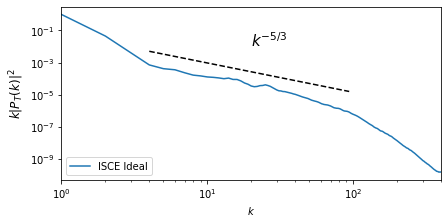

In [ ]:
for fs, label, name in zip(fss, labels, names):
    Ideal = fs[-1]
    #idealT = Ideal.t.index(min(Ideal.t, key=lambda x : abs(x-3.0)))
    Nideal = fs[-1]['Domain'].attrs['nx'][0] // 2
    KESpecIdeal = getPowerSpectrumSq(Ideal, GetKESF(Ideal))


    ### Model Power Spectrum

    fig, axs = plt.subplots(1, 1, sharex=True)
    fig.set_size_inches(6,3)
    fig.tight_layout()

    # Kinetic energy density power
    axs.loglog(np.arange(1, Nideal+1), np.arange(1, Nideal+1)*KESpecIdeal, label=label)# label=r'$IS \ Ideal$')
    #     axs.loglog(np.arange(1, Nresistive+1), np.arange(1, Nresistive+1)*KESpecResistive, label=r'$Single \ Fluid \ Resistive$')
    #     axs.loglog(np.arange(1, NtwoFluid+1), np.arange(1, NtwoFluid+1)*KESpecTwoFluid, label=r'$Two \ Fluid \ Resistive$')
    axs.set_ylabel(r"$k|P_{T}(k)|^2$", {'fontsize':'large'})
    axs.set_xlabel(r'$k$')
    # axs.loglog([4, 94.868], [5*10**-3, 5*10**(-3 - 1.5*5/3)], 'k--')
    axs.loglog([4, 94], [5*10**-3, 5*10**(-3 - 1.5*5/3)], 'k--')
    axs.annotate(r'$k^{-5/3}$', xy=(20, 0.01), fontsize=15)
    axs.set_xlim([1, Nideal])
    axs.legend(loc='lower left')


    # plt.savefig('ConfirmationReportPlots/KH/KolmoEnergyIdeal.eps', format='eps', dpi=1200, bbox_inches='tight')
    plt.savefig('ConfirmationReportPlots/KH/KolmoEnergy_'+name+'.pdf', dpi=1200, bbox_inches='tight')

    plt.show()